In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from typing import List

In [21]:
df = pd.read_csv('Datasets/student-lifestyle.csv')

In [23]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78


In [24]:
df.info

<bound method DataFrame.info of       Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1

cluster
 0    1928
-1      72
Name: count, dtype: int64


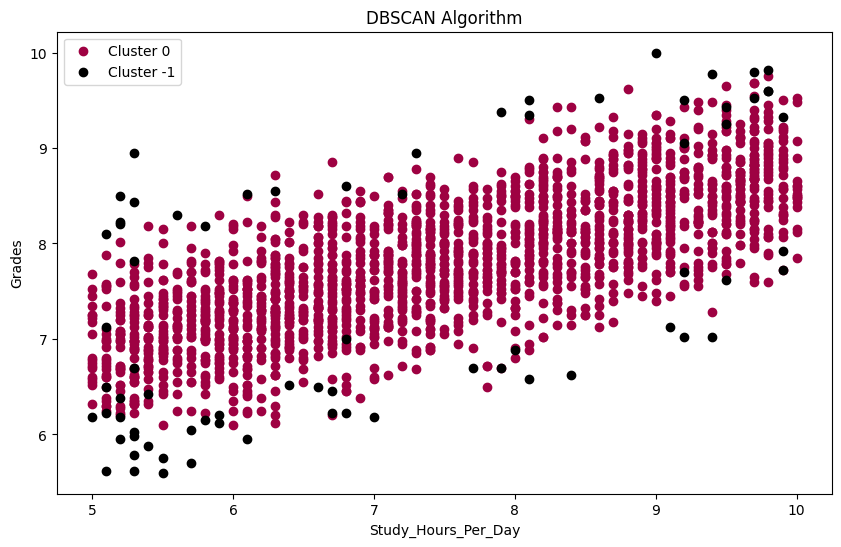

   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

  Stress_Level  Gender  Grades  cluster  
0     Moderate    Male    7.48        0  
1          Low

In [25]:
num_cols = df.select_dtypes(include=['float64']).columns
num_data = df[num_cols]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

# DBSCAN parameters
eps = 1  # Maximum distance for two samples to be considered as in the same neighborhood
min_samples = 10  # Minimum number of samples for a point to be considered as a core point

# Run DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
df['cluster'] = db.fit_predict(scaled_data)

# Check how many points belong to each cluster
print(df['cluster'].value_counts())

plt.figure(figsize=(10, 6))

unique_labels = set(df['cluster'])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with a different color
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points = -1
        color = 'k'  # Black for noise
    data_cluster = df[df['cluster'] == label]
    plt.scatter(data_cluster['Study_Hours_Per_Day'], 
                data_cluster['Grades'], 
                color=color, label=f"Cluster {label}")

# Add plot title and labels
plt.title("DBSCAN Algorithm")
plt.xlabel('Study_Hours_Per_Day')
plt.ylabel('Grades')
plt.legend()
plt.show()

# Display the resulting DataFrame with clusters
print(df.head())

In [33]:
num_colums = df.select_dtypes(include=['float64']).columns
num_data = df[num_colums]

# Standardise the data for DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.1, min_samples=5)  # Initial parameters
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels to the original data
df['dbscan_label'] = dbscan_labels

# Filter rows considered anomalous (label == -1)
anomalous_data = df[df['dbscan_label'] == -1]

# Display the anomalous rows
print(anomalous_data)

      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
51            52                  9.0                            2.6   
99           100                  5.3                            3.5   
186          187                  5.2                            1.0   
328          329                  9.1                            2.5   
377          378                  5.7                            0.3   
479          480                  8.1                            3.7   
701          702                  5.3                            0.1   
764          765                  5.5                            1.8   
870          871                  9.7                            0.1   
1014        1015                  9.4                            3.6   
1034        1035                  5.2                            1.5   
1456        1457                  6.6                            2.5   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
51          

In [34]:
class DB:
    def __init__(self, eps: float = 1.0, minPts: int = 5, equation: str = 'euclidean') -> None:
        self.eps = eps # Radius for neighbourhood search
        self.minPts = minPts # Minimum number of points to form a cluster
        self.equation = equation
        
    def fit(self, dataframe: np.ndarray) -> List[List[int]]:
        # Initialise labels array with -1
        self.labels = np.zeros(len(dataframe), dtype=int) - 1
        self.clusters = [] # List to hold all clusters
        cidx = 0 # Cluster ID counter
        for x in range(len(dataframe)):
            if self.labels[x] == -1:
                neighbours = self.get_neighbours(dataframe, x)
                if len(neighbours) < self.minPts:
                    self.labels[x] = 0 # Mark point as anomaly
                else:
                    cidx += 1
                    self.clusters.append([x])
                    self.labels[x] = cidx # Assign cluster ID to the point

                    # Exapnd the cluster with points
                    for y in neighbours:
                        if self.labels[y] == -1:
                            self.labels[y] = cidx
                            self.clusters[cidx-1].append(y)
                            neighbours2 = self.get_neighbours(dataframe, y)
                            if len(neighbours2) >= self.minPts:
                                neighbours += list(set(neighbours2) - set(neighbours))
                        elif self.labels[y] == 0:
                            self.labels[y] = cidx
                            self.clusters[cidx-1].append(y)
        return self.clusters

    def get_neighbours(self, dataframe: np.ndarray, x: int) -> List[int]:
        neighbours = set()
        # Iterate over all points to calculate distances
        for y in range(len(dataframe)):
            if self.distance(dataframe[x], dataframe[y]) <= self.eps:
                neighbours.add(y)
        return list(neighbours)
    
    def distance(self, x: np.ndarray, y: np.ndarray) -> float:
        # Euclidean distance
        return np.sqrt(np.sum((x-y)**2))
                           

    def plot(self, data: np.ndarray) -> None:
        # Create a 2D plot
        plt.figure(figsize=(10, 8))

        # Find noise points and clusters
        noise_idx = np.where(self.labels == 0)[0]
        cluster_idxs = [np.array(c) for c in self.clusters]

        # Assign colours to clusters
        colours = cm.rainbow(np.linspace(0, 1, len(self.clusters) + 1))

        # Plot each cluster
        for i, cluster_idx in enumerate(cluster_idxs):
            plt.scatter(data[cluster_idx, 0], data[cluster_idx, 1], 
                        color=colours[i], s=10, label=f'Cluster {i + 1}')

        # Plot anomalies
        if len(noise_idx) > 0:
            plt.scatter(data[noise_idx, 0], data[noise_idx, 1], 
                        color='black', s=10, label='Anomalies')

        # Add labels and legend
        plt.title("DBSCAN Clustering")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

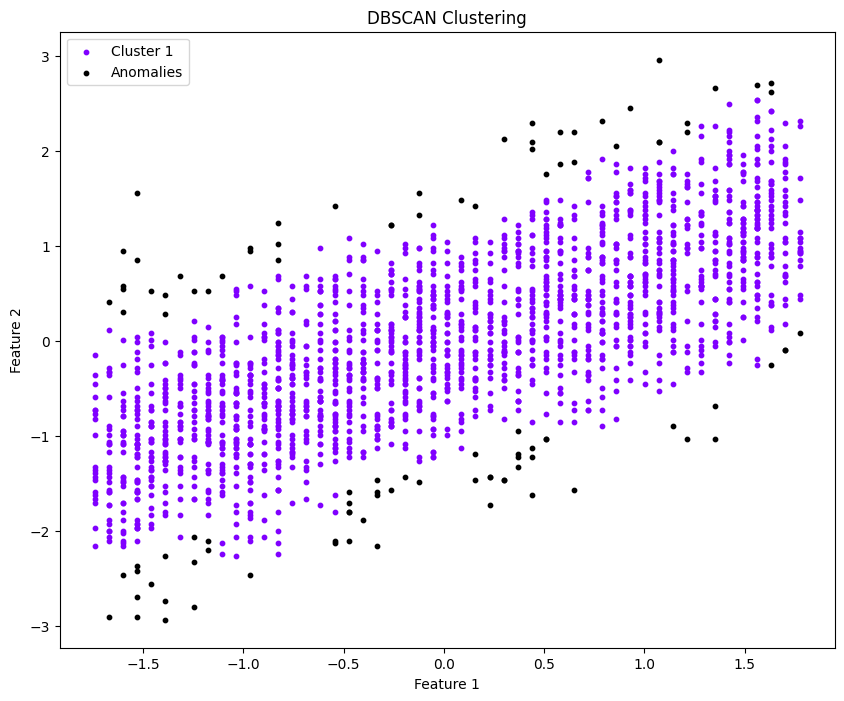

In [42]:
scaler = StandardScaler()
data = scaler.fit_transform(df[['Study_Hours_Per_Day', 'Grades']])
db = DB(0.2, 10)
db.fit(data)
db.plot(data)
anomalies = np.where(db.labels == 0)[0]